<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/Ahmed_Adel_Aboushanab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ahmed Adel Aboushanab**Hypotheses**

Null hypothesis: all chromosomes carry an equal number of variants

Alternate Hypothesis: all chromosomes do not carry an equal number of variants

In [2]:
import pandas as pd
import seaborn as sns
person2 = pd.read_table('https://github.com/ahmedmoustafa/platinum-genomes/blob/main/tsv/NA12878.tsv.gz?raw=true', compression='gzip')
person2.head()

,chr,pos,id,ref,alt
0,chr1,14677,rs201327123,G,A
1,chr1,15922,rs375964566,A,G
2,chr1,15956,rs112448831,G,A
3,chr1,16014,rs113442401;rs75082847,C,T
4,chr1,16298,rs62636498;rs77798508,C,T


In [3]:
person2.shape

(4489434, 5)

In [4]:
#Number of variations per chromosome/length of the chromosome
chromosomes = person2.groupby('chr')
list_1 = chromosomes.groups.keys()
list_2 = person2.groupby('chr').size()
#chromosomes.first()
#chromosomes
#print(chromosomes.keys())
#print(person2.groupby('chr').group_keys)

In [5]:
Chromosomes_2 = person2.groupby('chr').size()
len(Chromosomes_2)
Chromosomes_2

#XX["chr1"]
#Chromosomes_2['chr1']

chr
chr1     341660
chr10    222282
chr11    221447
chr12    209175
chr13    171720
chr14    138570
chr15    126904
chr16    132160
chr17    120051
chr18    129078
chr19    101268
chr2     358140
chr20     97451
chr21     65730
chr22     62361
chr3     296244
chr4     319510
chr5     272746
chr6     283652
chr7     250035
chr8     229848
chr9     189660
chrM         20
chrX     149722
dtype: int64

In [6]:
Sizes = chromosomes.size()
Sizes

chr
chr1     341660
chr10    222282
chr11    221447
chr12    209175
chr13    171720
chr14    138570
chr15    126904
chr16    132160
chr17    120051
chr18    129078
chr19    101268
chr2     358140
chr20     97451
chr21     65730
chr22     62361
chr3     296244
chr4     319510
chr5     272746
chr6     283652
chr7     250035
chr8     229848
chr9     189660
chrM         20
chrX     149722
dtype: int64

In [7]:
chr_length = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/platinum-genomes/main/chromosomes.tsv")
chr_length.head()

,chr,length,genbank,refseq
0,chr1,248956422,CM000663,NC_000001
1,chr2,242193529,CM000664,NC_000002
2,chr3,198295559,CM000665,NC_000003
3,chr4,190214555,CM000666,NC_000004
4,chr5,181538259,CM000667,NC_000005


In [8]:
chromosomes = person2.groupby('chr')
list_1 = list(chromosomes.groups.keys())
list_2 = person2.groupby('chr').size()
Dictionary_1 = {list_1[i]: list_2[i] for i in range(len(list_1))}
Dictionary_1

{'chr1': 341660,
 'chr10': 222282,
 'chr11': 221447,
 'chr12': 209175,
 'chr13': 171720,
 'chr14': 138570,
 'chr15': 126904,
 'chr16': 132160,
 'chr17': 120051,
 'chr18': 129078,
 'chr19': 101268,
 'chr2': 358140,
 'chr20': 97451,
 'chr21': 65730,
 'chr22': 62361,
 'chr3': 296244,
 'chr4': 319510,
 'chr5': 272746,
 'chr6': 283652,
 'chr7': 250035,
 'chr8': 229848,
 'chr9': 189660,
 'chrM': 20,
 'chrX': 149722}

In [9]:
#chr_length['length'][0]
#chr_length['chr'][0]
list_chr = list(chr_length['chr'])
list_length = list(chr_length['length'])
#res = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
Dictionary_2 = {list_chr[i]: list_length[i] for i in range(len(list_chr))}
Dictionary_2
#len(chr_length)
#Length  = chr_length['length']
#Length

{'chr1': 248956422,
 'chr2': 242193529,
 'chr3': 198295559,
 'chr4': 190214555,
 'chr5': 181538259,
 'chr6': 170805979,
 'chr7': 159345973,
 'chr8': 145138636,
 'chr9': 138394717,
 'chr10': 133797422,
 'chr11': 135086622,
 'chr12': 133275309,
 'chr13': 114364328,
 'chr14': 107043718,
 'chr15': 101991189,
 'chr16': 90338345,
 'chr17': 83257441,
 'chr18': 80373285,
 'chr19': 58617616,
 'chr20': 64444167,
 'chr21': 46709983,
 'chr22': 50818468,
 'chrX': 156040895,
 'chrY': 57227415}

In [24]:
#A loop that takes confirms that it is working on the same chromosome and return the size/length for that chromosome
count = 0
dist = {}
newDictionary = {}
keys = set(Dictionary_1.keys()).union(set(Dictionary_2.keys()))
differences = {}
for key in keys:
    if (key in Dictionary_1) and (key in Dictionary_2):
      dist[key] = 100* Dictionary_1[key]/Dictionary_2[key]
      newDictionary[key] = Dictionary_1[key], Dictionary_2[key]
      count += 1
    else:
      count += 0

print(dist)
print(count)
print(newDictionary)

NameError: ignored

In [25]:
#Get the correlation between the two variables in the data.
import numpy
numpy.corrcoef(
    [Dictionary_1.get(x, 0) for x in keys],
    [Dictionary_2.get(x, 0) for x in keys])[0, 1]

0.9584204442803693

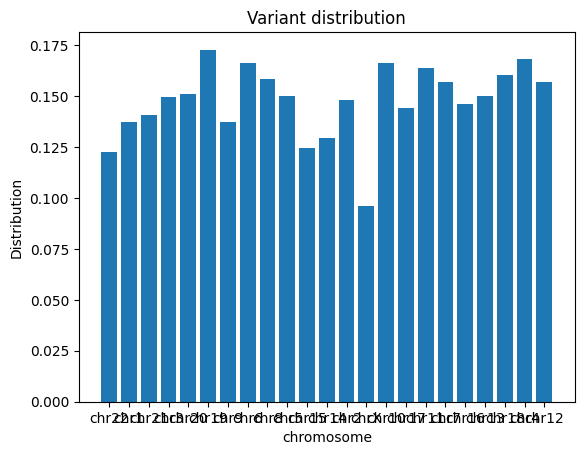

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import random

#Create a bar plot
plt.bar(dist.keys(), dist.values())
plt.title('Variant distribution')
plt.xlabel('chromosome')
plt.ylabel('Distribution')
plt.show()

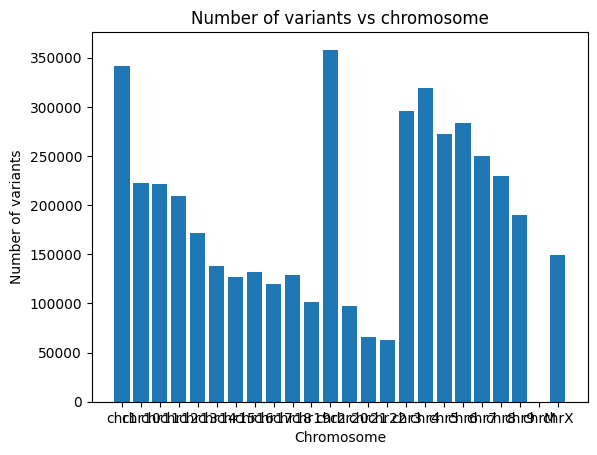

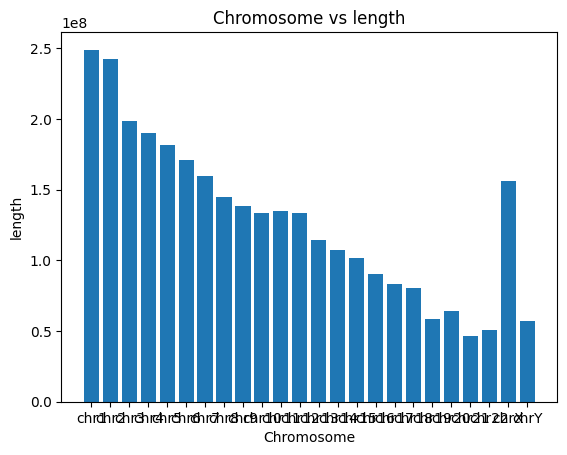

In [12]:
plt.bar(Dictionary_1.keys(), Dictionary_1.values())
plt.title('Number of variants vs chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Number of variants')
plt.show()

plt.bar(Dictionary_2.keys(), Dictionary_2.values())
plt.title('Chromosome vs length')
plt.xlabel('Chromosome')
plt.ylabel('length')
plt.show()

<BarContainer object of 24 artists>

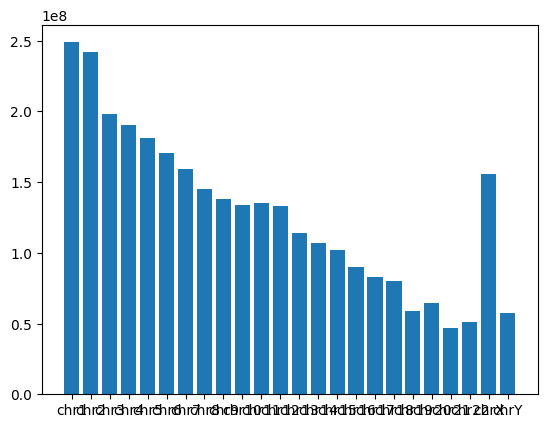

In [13]:
plt.bar(Dictionary_2.keys(), Dictionary_2.values())

In [15]:
Dictionary_1.get['chr1']

TypeError: ignored

In [ ]:
for i in range(len(list_2)):
    if Dictionary_1.get(key) == Dictionary_2.get(key):
      Variant_distribution = 100* Dictionary_1[key]/Dictionary_2[key]
      #X = chr_length['chr']
      dist[key] += 1
      counts += 1
    else:
      counts += 1

print(dist)
print(counts)

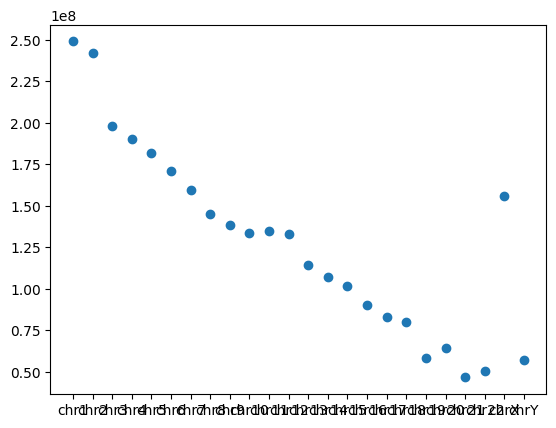

In [16]:
plt.scatter(Dictionary_2.keys(), Dictionary_2.values())